In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from typing import Annotated
from langgraph.graph.message import add_messages 

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')


In [5]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="openai/gpt-oss-120b")

In [6]:
llm.invoke("Hi")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "Hi". Need to respond friendly. No disallowed content. Just a greeting.'}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 72, 'total_tokens': 111, 'completion_time': 0.083267723, 'completion_tokens_details': {'reasoning_tokens': 21}, 'prompt_time': 0.003617019, 'prompt_tokens_details': None, 'queue_time': 0.062387121, 'total_time': 0.086884742}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_8a618bed98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf011-fa7e-7022-9867-8af1e41528ee-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 72, 'output_tokens': 39, 'total_tokens': 111, 'output_token_details': {'reasoning': 21}})

In [7]:
#Now starting to make the nodes

In [9]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

In [11]:
graph=StateGraph(State)
graph.add_node("superbot",superbot)

graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

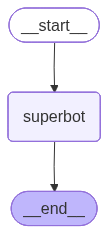

In [13]:
builder=graph.compile()
from IPython.display import display,Image
display(Image(builder.get_graph().draw_mermaid_png()))

In [20]:
config={"configurable":{"thread_id":"1"}}
builder.invoke({"messages":"My name is paras and i like cricket\n"},config)

{'messages': [HumanMessage(content='My name is paras and i like cricket\n', additional_kwargs={}, response_metadata={}, id='658d4747-8fb7-43f3-8431-a56a83f7fc94'),
  AIMessage(content="Nice to meet you, Paras! Cricket is such an exciting sport—whether you enjoy watching the matches, playing in the backyard, or following the stats, there’s always something thrilling about it. Do you have a favorite team or player? Or maybe a memorable match that stuck with you? I'd love to hear more!", additional_kwargs={'reasoning_content': 'The user says "My name is paras and i like cricket". Probably they just want a response acknowledging. We can respond friendly. No disallowed content.'}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 80, 'total_tokens': 185, 'completion_time': 0.225164189, 'completion_tokens_details': {'reasoning_tokens': 32}, 'prompt_time': 0.003219722, 'prompt_tokens_details': None, 'queue_time': 0.054163318, 'total_time': 0.228383911}, 'model_name